# Agrégation externe d'Informatique -- Sujet 0 -- Épreuve 2

**Thèmes : Programmation Python, Complexité, Graphes, Algorithmes de graphes**

## 1 Ordonnancement de tâches

### 1.1 Représentations des ensembles de tâches

**Tâches $T_1$ de l'exemple**

In [1]:
T1 = [(9, 11), (0, 4), (1, 7), (14, 19), (3, 12), (13, 15), (8, 17)]

#### Q1

In [2]:
T2 = [(5, 12), (13, 15), (0, 2), (1, 4), (3, 7), (10, 14), (8, 11), (6, 9)]

#### Q2

- Pour les tâches de $T_1$, on peut constater 3 groupes de tâches 2 à 2 disjointes : $(t_2, t_6)$, $(t_4, t_5)$ et $(t_1, t_0, t_3)$ on ne peut pas faire mieux puisque par exemple pour $x = 10$ on a : $x\in t_0$ et $x\in t_4$ et $x\in t_6$ ; il nous faut donc 3 machines a minima
- Pour les tâches de $T_2$, le minimum est également 3 et le groupement suivant fonctionne : $(t_2, t_4, t_6)$, $(t_3, t_5, t_7)$ et $(t_0, t_1)$. 

On introduit la notion d'_événement_ : _(date, indice, debut-ou-fin)_ Les événements pour $T_1$ sont donnés :

In [3]:
Ev1  =  [(0, 1, 0), (1, 2, 0), (3, 4, 0), (4, 1, 1), (7, 2, 1), (8, 6, 0), (9, 0, 0), (11, 0, 1), (12, 4, 1),
         (13, 5, 0), (14, 3, 0), (15, 5, 1), (17, 6, 1), (19, 3, 1)]

#### Q3

Les 7 premiers événements pour $T_2$ :

In [4]:
REP3 = [(0, 2, 0), (1, 3, 0), (2, 2, 1), (3, 4, 0), (4, 3, 1), (5, 0, 0), (6, 7, 0)]

#### Q4

La fonction `formate` qui, à partir d'une liste d'intervalles retourne la liste triée par ordre croissant des événemnts :

In [5]:
def inserer(liste, i, elt):
    while i >= 0 and liste[i] > elt:
        liste[i+1] = liste[i]
        i -= 1
    liste[i+1] = elt
    
def formate(intervalles):
    evenements = [None] * 2*len(intervalles)
    i = -1
    for indice, (debut, fin) in enumerate(intervalles):
        inserer(evenements, i, (debut, indice, 0))
        i += 1
        inserer(evenements, i, (fin, indice, 1))
        i += 1
    return evenements

In [6]:
print(formate(T1)) # ce n'est pas par provocation mais juste pour avoir une seule ligne ;)

[(0, 1, 0), (1, 2, 0), (3, 4, 0), (4, 1, 1), (7, 2, 1), (8, 6, 0), (9, 0, 0), (11, 0, 1), (12, 4, 1), (13, 5, 0), (14, 3, 0), (15, 5, 1), (17, 6, 1), (19, 3, 1)]


On peut vérifier notre réponse à la question 3 :

In [7]:
Ev2 = formate(T2)

In [8]:
Ev2[:7] == REP3

True

#### Q5

La fonction `formate` est un tri par sélection : on crée une liste pour accueillir les $2n$ événements correspondants aux $n$ intervalles. Puis pour chaque intervalle $I$ on insère deux événements dans la liste déjà triée des $k$ premiers événements déjà placés. A partir du $n^e$ événement, dans le pire des cas, la fonction `insere` sera amenée à tout décaler vers la droite, effectuant donc de l'ordre de $n^2$ opérations élémentaires. 

### 1.2 Calcul du nombre maximum de tâches simultanées

On appelle $\cal{K}(T)$ le ombre maximum de tâches simultanément en cours d'exécution. Par exemple $\cal{K}(T_1) = 3$.

#### Q6

On a $\cal{K}(T_2) = 3$

### Q7

In [9]:
def nb_simultanees(evts):
    max_simul = 0
    nb_simul = 0
    for date, indice, debut_fin in evts:
        if debut_fin == 0:
            nb_simul += 1
            if nb_simul > max_simul:
                max_simul = nb_simul
        else:
            nb_simul -= 1
    return max_simul

#### Q8

L'invariant est : à chaque début de boucle `for` la variable `max_simul` représente le nombre maximum de tâches qui on été exécutées simultanément à la date `date`. L'invariant est vraiment en entrant dans la boucle : aucune tâche n'a commencé, et donc on a bien 0 tâche en simutanée. Supposons qu'on soit à un tour quelconque de boucle, la date est `date` et `max_simul` représente le maximum de tâches qui ont été exécutées simultanément à une date inférieure à `date`. Si l'événement qu'on explore est un début de tâche (`debut_fin` vaut 0) alors on va incrémenter `nb_simul` qui représente le nombre de tâches en cours simultanément. Et si ce nombre dépasse `max_simul` on met à jour `max_simul` ; si on explore un événement de fin de tâche, alors on décrémente `nb_simul` qui ne peut donc pas dépasser `max_simul` et effectivement une tâche se terminant, on en a une de moins en cours d'exécution. 

Dans tous les cas, à l'amorce du prochain passage, `max_simul` représente toujours le nombre maximum de tâches qui ont été exécutées simultanément.

In [10]:
nb_simultanees(Ev1)

3

### 1.3 Calcul d'un ordonnancement optimal

#### Q9

Ordonnancement obtenu pour $T_2$ :

In [11]:
ORD2 = [1, 0, 0, 1, 0, 2, 0, 2]

#### Q10

In [12]:
def plus_petite_machine(utilisees):
    for i in range(len(utilisees)):
        if utilisees[i] == 0:
            return i

def ordo_glouton(evts):
    n = len(evts) // 2
    machines_utilisees = [0] * n
    ordo = [-1] * n
    for date, i_tache, debut_fin in evts:
        if debut_fin == 0:
            i_machine = plus_petite_machine(machines_utilisees)
            ordo[i_tache] = i_machine
            machines_utilisees[i_machine] = 1
        else:
            i_machine = ordo[i_tache]
            machines_utilisees[i_machine] = 0
    return ordo

Vérifions la cohérence des résultats :

In [13]:
ordo_glouton(Ev1)

[1, 0, 1, 2, 2, 1, 0]

In [14]:
ordo_glouton(Ev2) == ORD2

True

#### Q11

Nous devons prouver que :

1. une machine attribuée est libre et que c'était la plus petite possible
2. une tâche qui se termine libère sa machine

Le point 1 est garanti par construction du tableau des machines et la fonction `plus_petite_machine` qui parcourt les indices de machines en commençant par 0 et qui retourne cet indice dès que la valeur du tableau vaut 0 (signifiant que la machine est libre). Le point 2 est vérifié par le `else` de la boucle principale de `ordo_glouton` : dès qu'on croise une date de fin, on libère la machine qui lui était affectée.

#### Q12

Si l'algorithme n'était pas optimal, cela voudrait dire qu'à un moment, pour un intervalle de tâches $T$, une $k+1$-ième machine a été affectée à une tâche $t$ alors que $\cal{K}(T) = k$. Cela signifie qu'une tâche parmi celles qui utilisaient les machines $0, 1,\ldots k-1$ s'est terminée au moment où $t$ se lance. Mais alors, d'après le point 2 de la question précédente, la machine $j < k$ ainsi libérée aurait dûe être affectée à la tâche $t$ (point 1 de la question précédente). Il y a contradiction, l'hypothèse de départ est donc fausse : l'algorithme est optimal.

#### Q13

Pour chaque événement, on va parcourir la liste des machines (et il peut y en avoir autant que d'intervalles dans le pire des cas) donc la complexité est **quadratique** en fonction du nombre d'intervalles.

## 2 Lien avec les graphes

In [15]:
import pygraph

On représente les ensembles d'intervalles par des graphes ; par exemple pour $T_1$ : 

In [16]:
GT1 = pygraph.Graph(7)
GT1.add_edges_from([(0, 4), (0, 6), (1, 4), (1, 2), (5, 6), (5, 3), (3, 6), (2, 4), (4, 6)])
GT1.position([(2, -0.5, 0), (5, 0.5, 0), (1, -2.5, 0), (3, 2.5, 0), (4, -1.5, 1.5), (6, 1.5, 1.5), (0, 0, 3)], 0.5)

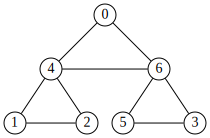

In [17]:
GT1.view

In [ ]:
GT1.write('assets/images/agreg2022_S0E2/GT1')

### Q14

Le graphe de $T_2$ :

In [18]:
GT2 = pygraph.Graph(8)
GT2.add_edges_from([(0, 4), (0, 7), (0, 6), (0, 5), (4, 7), (4, 3), (5, 6), (5, 1), (6, 7), (3, 2)])
GT2.position([(0, 0, 0), (4, 1, 0), (3, 2, 0), (2, 3, 0), (5, -1, 0), (1, -2, 0), (7, 0.5, 0.75), (6, -0.5, 0.75)], 0.7)

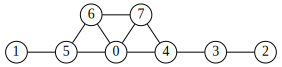

In [19]:
GT2.view

In [ ]:
GT2.write('assets/images/agreg2022_S0E2/GT2')

#### Q15

In [20]:
def inter(t1, t2):
    a1, b1 = t1
    a2, b2 = t2
    return a1 < a2 < b1 or a2 < a1 < b2

def liste_vers_graphe(T):
    n = len(T)
    graph = [[] for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            if inter(T[i], T[j]):
                    graph[i].append(j)
                    graph[j].append(i)
    return graph

In [21]:
A2 = liste_vers_graphe(T2)

In [22]:
A2

[[4, 5, 6, 7], [5], [3], [2, 4], [0, 3, 7], [0, 1, 6], [0, 5, 7], [0, 4, 6]]

**Bonus Q15**

On peut créer un _pygraph_ à partir d'une liste d'adjacences :

In [23]:
def liste_adjacence_pygraph(adj):
    n = len(adj)
    g = pygraph.Graph(n)
    for i in range(n):
        for j in adj[i]:
            if j > i:
                g.add_edge(i, j)
    return g

Et on retrouve le graphe de $T_2$  fait _à la main_ :

In [138]:
G2 = liste_adjacence_pygraph(A2)

In [139]:
G2.same_position_as(GT2)
G2.scale(0.7)

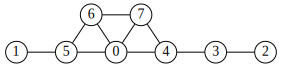

In [140]:
G2.view

#### Q16

On considère le graphe suivant :

In [27]:
G3 = pygraph.Graph(5)
G3.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4)])
G3.position([(0, 0, 0.75), (1, -1, 0), (2, 0, -0.75), (3, 1, 0), (4, 2, 0)], 0.6)

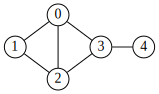

In [28]:
G3.view

In [ ]:
G3.write('assets/images/agreg2022_S0E2/G3')

Voici une réalisation possible de ce graphe d'intervalles :

```
       |---t2---|
 |---t1---|  |----t3-----|
    |-----t0-------|  |-t4--| 
 |--|--|--|--|--|--|--|--|--|--->
 0  1  2  3  4  5  6  7  8  9
``` 

On considère les graphes cycliques :

In [29]:
def cyclique(n):
    g = pygraph.Graph(n)
    for i in range(n):
        g.add_edge(i, (i+1)%n)
    return g

In [30]:
C4 = cyclique(4)

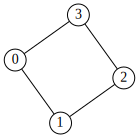

In [31]:
C4.view

In [ ]:
C4.write('assets/images/agreg2022_S0E2/C4')

#### Q17

Soit $t_0$ et $t_1$ deux intervalles de temps, avec une intersection non vide. Puisque $t_2$ doit chevaucher $t_1$ sans toucher à $t_0$ alors $t_1$ doit donc _déborder_ de $t_0$, disons par la droite (par la gauche le raisonnement reste le même), comme ceci :

```
    |---t1---|
|---t0---|
```

Dès lors $t_2$ vient chevaucher la partie de $t_1$ qui n'est pas en contact avec $t_0$ :

```
           |---t2---|
    |---t1---|
|---t0---|
```

De même, $t_3$ doit chevaucher $t_2$ sans toucher à $t_1$... mais en touchant $t_0$ ce qui n'est pas possible. On pourrait formaliser un peu plus en introduisant les bornes des intervalles : $[d_0, f_0]$, ... $[d_3, f_3]$. On a alors une contradiction sur les inégalités : 

$$d_0\lt d_1\lt f_0\lt d_2\lt f_1\lt d_3\lt f_2$$

et 

$$d_2\lt f_0$$


#### Q18

Le raisonnement ci-dessus se généralise pour un cycle d'intervalles $t_0, t_1\ldots t_{n-1}$ : chaque intervalle $t_i$ pour $2\gt i\lt n-1$ chevauche l'intervalle $t_{i-1}$ mais en ne touchant pas à $t_{i-2}$ mais $t_{n-1}$ doit chevaucher $t_{n-2}$ sans toucher $t_{n-3}$ qui se trouve plus à gauche, mais en chevauchant $t_0$ qui lui est complètement à gauche, ce qui est impossible.

#### Q19

Soit $G = (S, A)$ un graphe d'intervalles et soit $(S', A')$ un sous graphe induit de $G$. Soit $t_i$ et $t_j$ deux intervalles.

- Si $t_i\cap t_j = \emptyset$ alors $(i, j)\notin A$ et donc $(i, j)\notin A'$
- Si $t_i\cap t_j \neq \emptyset$, on considère les deux cas suivants :
    - $i\notin S'$ ou $j\notin S'$ alors par construction du graphe induit $(i, j)\notin A'$ et il suffit de ne pas considérer $t_i$ ou $t_j$ parmi les intervalles associés au graphe induit pour ne pas avoir d'incohérence ;
    - $i\in S'$ et $j\in S'$ et donc $i\in S$ et $j\in S$ ; comme $G$ est un graphe d'intervalles, on a $(i, j)\in A$ et par construction du graphe induit $(i, j)\in A'$

Réciproquement, si on considère deux sommets $i$ et $j$ du graphe induit tel que $(i, j)\in A'\subset S$ alors $(i, j)\in A$ et comme $G$ est un graphe d'intervalles on a $t_i\cap t_j \neq \emptyset$.

#### Q20

Un graphe contenant un cycle de longueur supérieure ou égale à 4 sans corde ne peut pas être un graphe d'intervalles. En effet, car sinon, par le résultat de Q19, le sous graphe induit réduit au graphe cyclique serait un graphe d'intervalles ce qui contredit Q18.

## 3 Coloration de graphes

### 3.1 Préliminaires

Le sujet présente la définition de ce qu'est la coloration d'un graphe $G$. 

**Définition**

Une $k$-_coloration_ d'un graphe $G = (S, A)$ est une fonction $c$ de $S \rightarrow \{0,\ldots k-1\}$ telle que pour toute arète $(s, t)\in A$, $c(s)\neq c(t)$.

Créons le graphe $G_0$ de l'exemple :

In [32]:
G0 = pygraph.Graph(6)
G0.add_edges_from([(0, 1), (1, 2), (1, 4), (1, 3), (2, 3), (3, 5), (4, 5)])
G0.position([(1, 0, 0), (0, 0, 1), (2, -1, 0), (4, 1, 0), (3, 0, -1), (5, 1, -1)], 0.6)

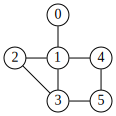

In [33]:
G0.view

In [ ]:
G0.write('assets/images/agreg2022_S0E2/G0_brut')

On peut remplacer les étiquettes des sommets par un numéro de couleur et mettre en avant les deux sommets qui font que ce choix n'est pas une coloration au sens de la définition :

In [34]:
G0.set_labels('021113')
G0.label_on()
G0.color_on(2, 'lightblue')
G0.color_on(3, 'lightblue')

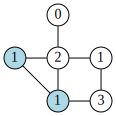

In [35]:
G0.view

In [ ]:
G0.write('assets/images/agreg2022_S0E2/G0_bad_coloration')

On reprend $G_0$  pour montrer une 4-coloration :

In [36]:
G0b = G0.copy()
G0b.same_position_as(G0)
G0b.scale(0.6)

In [37]:
G0b.set_labels('021013')
G0b.label_on()

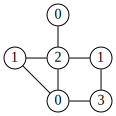

In [38]:
G0b.view

In [ ]:
G0b.write('assets/images/agreg2022_S0E2/G0b_coloration')

**Définition**

$G$ est $k$-_colorable_ s'il possède une $k$_coloration_. $\chi(G)$ est le **nombre chromatique** de $G$ ie le plus petit entier $k$ tel que $G$ est $k$_colorable_. 

#### Q21

$\chi(G_0) = 3$. Et voici une 3-coloration possible (avec de vraies couleurs) :

In [39]:
G0c = G0.copy()
G0c.same_position_as(G0)
G0c.scale(0.6)

In [40]:
G0c.colorise()

3

In [41]:
G0c.color_on()

Voici le graphe coloré, avec le **numéro des sommets en étiquettes** pour pouvoir les nommer :

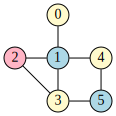

In [42]:
G0c.view

In [ ]:
G0c.write('assets/images/agreg2022_S0E2/G0c_true_coloration')

Dans cette 3-coloration, le sous graphe constitué des sommets 1, 2 et 3 forment un graphe complet. Utiliser 2 couleurs pour ces sommets est impossible. 3 est donc bien le plus petit entier possible pour une coloration.

#### Q22


In [43]:
G1 = pygraph.Graph(7)
G1.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (3, 5), (5, 6), (1, 6)])
G1.position([(0, -1, 0.5), (4, 1, 0.5), (3, 0, 0), (2, -2, 0), (5, 2, 0), (1, -1, 1.5), (6, 1, 1.5)], 0.6)

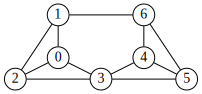

In [44]:
G1.view

In [ ]:
G1.write('assets/images/agreg2022_S0E2/G1')

Ci-dessous une 4-coloration obtenue via l'algorithme D-Satur. On ne peut pas faire mieux : 2 doit être de couleur différente de 0, 1 et 3... seuls 1 et 3 peuvent être de la même couleur. Cela nous donne 3 couleurs. 4 et 5 ne peuvent avoir la même couleur que 3. Ainsi 1, 4, et 5 couvrent les 3 couleurs, obligeant 6 à une 4e.

In [45]:
G1.colorise()
G1.color_on()

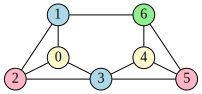

In [46]:
G1.view

In [ ]:
G1.write('assets/images/agreg2022_S0E2/G1_coloration')

#### Q23

(a) Soit $s_1 \rightarrow s_2\rightarrow\ldots \rightarrow s_n\rightarrow s_1$ le graphe $\cal{C}_n$.  Si $n$ est pair, le graphe est bi-parti : chaque sommet pair est relié à 2 sommets impairs et vice-versa ; 2 couleurs sont alors suffisante. Sinon, le dernier sommet $n$ impair est lié à un sommet pair ($n-1$) et un sommet impair (1). Il faudra donc une 3e couleur. Conclusion $\chi(\cal{C}_n) = 2 + n\,\mathtt{mod}\,2$.

(b) On appelle $P(n)$ la propriété suivante : si $G$ est un graphe complet à $n$ sommets alors $\chi(G) = n$. $P(1)$ est vraie. Montrons que pour tout $n$, $P(n) \Rightarrow P(n+1)$. Soit $G$ le graphe complet à $n$ sommets, $n$-coloré. Ajoutons un $n+1$-ième sommet et relions le aux autres pour obtenir un graphe $G'$ complet à $n+1$ sommets. Pour colorer ce nouveau sommet je ne peux utiliser une des $n$ couleurs déjà utilisées par les voisins du noeud, il me faut donc une $n+1$-ième couleur. Ainsi $\chi(G') = n+1$. 

**Définitions**

Le **degré** d'un sommet est le nombre de sommet qui lui sont adjacents. Une **clique** est un ensemble de sommets 2 à 2 adjacents. Le **nombre clique** est la taille d'une clique maximale et est notée $\omega(G)$.

#### Q24

${\cal K(T)} = \omega(G_{\cal T})$ (puisque le nombre maximum de machines en marchent simultanément est égal à la taille du plus grand sous graphe complet induit du graphe d'intervalles $G_{\cal T}$ qui est par définition le nombre clique de $G_{\cal T}$)

#### Q25

Soit $G$ un graphe connexe. Si on extrait une clique maximale $G'$ alors $G'$ est un graphe complet à $\omega(G)$ sommets et son nombre chromatique $\chi(G')$ vaut $\omega(G)$ (Q23b). Puisque $G'$ est un sous graphe de $G$, $\chi(G) \geq \chi(G')$. On a donc :

$$\chi(G) \geq \omega(G)$$

$G_1$ est un exemple de graphe pour lequel l'inégalité est stricte : $\omega(G_1) = 3$ et $\chi(G_1) = 4$. Si on retire l'arète entre les 2 sommets du haut (1 et 6), on obtient une égalité :

In [47]:
G1b = G1.copy()
G1b.remove_edge(1, 6)
G1b.same_position_as(G1)
G1b.scale(0.6)
G1b.label_off()
G1b.resize(0.12)
G1b.colorise()
G1b.color_on()

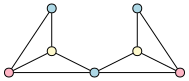

In [48]:
G1b.view

In [ ]:
G1b.write('assets/images/agreg2022_S0E2/G1b_coloration')

On note $\Delta(G)$ le degré maximal d'un sommet de $G$.

#### Q26

On a $\chi(G) \leq \Delta(G) + 1$. 

Pour $G_1$ il y a égalité (le degré max est 3 et on a bien 4 couleurs) et pour le graphe $G_{1b}$ l'inégalité est stricte.

### 3.2 Calcul du nombre chromatique

#### 27

Pour un graphe $G$ à $n$ sommets, la valeur maximale possible pour $\chi(G)$ est $n$. Parce qu'au pire $G$ est le graphe complet et on a montré qu'alors $\chi(G) = n$. 

#### 28

On parcourt chaque sommet $s$ de $G$, puis on vérifie qu'un voisin $v$ de $s$ n'a pas la même couleur. Si on on tombe sur deux voisins qui ont la même couleur on peut arrêter le parcours et renvoyer `False`. Si on va au bout du parcours on renvoie `True`.

In [49]:
def est_coloration(G, c):
    n = len(G)
    for s in range(n):
        for v in G[s]:
            if c[s] == c[v]:
                return False
    return True

Une version plus pythonique :

In [50]:
def est_coloration(G, c):
    n = len(G)
    return all(c[s] != c[v] for s in range(n) for v in G[s])

In [51]:
AG0 = [[1], [0, 2, 3, 4], [1, 3], [1, 2, 5], [1, 5], [3, 4]]

Vous vous souvenez, la première coloration n'en était pas une :

In [52]:
est_coloration(AG0, [0, 2, 1, 1, 1, 3])

False

Mais la 2e si :

In [53]:
est_coloration(AG0, [0, 2, 1, 0, 1, 3])

True

#### Q29

On incrémente de 1 les valeurs de la liste, en commençant par la dernière et en passant à la précédente si l'incrémentation à fait atteindre la valeur de $k$, auquel cas on remet cette valeur à 0. On stoppe si la valeur incrémentée est inféieure à $k$ où s'il s'agit de la première. En renvoie `True` si on est sur la première valeur et qu'elle a été incrémentée à $k$ (et donc 0).

In [54]:
def incrementer(c, k):
    for i in range(len(c)-1, -1, -1):
        c[i] += 1
        if c[i] == k:
            c[i] = 0
            if i == 0:
                return True
        else:
            return False

In [55]:
l1 = [2, 1, 0, 2, 2]
incrementer(l1, 3)

False

In [56]:
l1

[2, 1, 1, 0, 0]

In [57]:
l2 = [2, 2, 2, 2, 2]
incrementer(l2, 3)

True

In [58]:
l2

[0, 0, 0, 0, 0]

#### Q30

In [59]:
def k_colorable(G, k):
    coloration = [0] * len(G)
    est_k_colorable = est_coloration(G, coloration)
    while not est_k_colorable and not incrementer(coloration, k):
        est_k_colorable = est_coloration(G, coloration)
    return est_k_colorable

#### Q31

In [60]:
def chi(G):
    for k in range(2, len(G)):
        if k_colorable(G, k):
            return k

In [61]:
chi(AG0)

3

#### Q32

Comme il a été dit dans l'énoncé, pour un graphe à $n$ sommets, il y a $k^n$ colorations possibles des sommets par $k$ couleurs. Ainsi la fonction `k_colorable` à une complexité temporelle dans le pire des cas en ${\cal O}(k^n)$. Cette fonction est appelée avec $k = 2$, puis 3, ... jusqu'à $n$. Soit une complexité finale en ${\cal O}(n^n)$. Donc non, en pratique cette fonction n'est pas utilisable : 

In [62]:
20**20

104857600000000000000000000

In [63]:
50**50

8881784197001252323389053344726562500000000000000000000000000000000000000000000000000

### 3.3 Problème de décision et NP-complétude

#### Problème `k-coloration` (k fixé)

- Entrée : un graphe $G$
- Question le graphe $G$ est-il $k$-colorable ?

#### Problème `Coloration`

- Entrée : un graphe $G$ et un entier $k$
- Question : le graphe $G$ est-il $k$-colorable ? 

#### Q33

#### Q34

Soit deux entiers $h\leq k$. Soit $G = (S, A)$ un graphe. On va construire un graphe $G'$ copie de $G$ à laquelle au rajoute un graphe complet à $k - h$ sommets et chacun de ces nouveaux sommets est relié à chacun des sommets de G. Cette construction se fait en temps polynomiale.

- Si $G$ est $h$-colorable, soit $C$ une telle coloration. On construit alors la coloration $C'$ de $G'$ suivante : pour les sommets de $G'$ qui sont aussi des sommets de $G$ on utilise $C$ ($h$ couleurs), pour l'extension clique de $k - h$ sommets on utilise les couleurs $h + 1, \ldots k$. $G'$ est donc $k$-colorable.

- Si $G'$ est $k$-colorable. Soit $C$ une telle coloration. Pour la clique, $C$ utilise $k - h$ couleurs et aucune n'est utilisée sur les sommets de $G$ (puisque par construction ils sont reliés à chacun des sommets utilisant ces $k - h$ couleurs). Il reste donc $h$ couleurs pour les sommets de $G$ qui est donc $h$-colorable. 

#### Q35

Un parcours en profondeur, en ${\cal O}(n + m)$  où $n$ est le nombre de sommets et $m$ le nombre d'arètes :

In [64]:
def deux_colorable(G):
    a_traiter = [0]
    coloration = [-1] * len(G)
    coloration[0] = 0
    while a_traiter:
        s = a_traiter.pop()
        for v in G[s]:
            if coloration[v] == coloration[s]:
                return False
            elif coloration[v] == -1:
                coloration[v] = 1 - coloration[s]
                a_traiter.append(v)
    return True

In [65]:
AC6 = [[4, 5], [3, 5], [3, 4], [1, 2], [0, 2], [0, 1]]

In [66]:
C6 = liste_adjacence_pygraph(AC6)

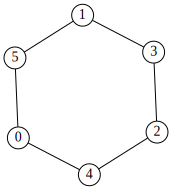

In [67]:
C6.view

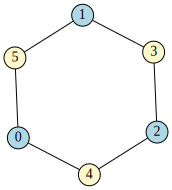

In [68]:
C6.colorise()
C6.color_on()
C6.view

In [ ]:
C6.write('assets/images/agreg2022_S0E2/C6_coloration')

In [69]:
deux_colorable(AC6)

True

#### Q36

Soit $G$ un graphe et $C$ une coloration de $k$ couleurs, un parcours de $G$ similaire à celui de la fonction `deux_colorable` permet de dire si oui ou non $C$ est une $k$-coloration de $G$. La vérification est polynomiale en ${\cal O}(n + m)$ prouvant que Coloration est bien dans NP.

**Définitions**

- un **littéral** est une variable ou sa négation
- une **clause** est une disjonction de littéraux
- une **forme normale conjonctive (FNC)** est une conjonction de clauses ; et dans une 3-FNC chaque clause contient exactement 3 littéraux.

Un exemple de 3-FNC :

$$\varphi_0 = (a \vee b \vee c) \wedge (\bar{a} \vee c \vee \bar{d}) \wedge (b \vee \bar{c} \vee d)$$ 

#### Problème `3-SAT`

- Entrée : une formule booléenne $\varphi$ en 3-FNC
- Sortie : la formule $\varphi$ est-elle satisfiable ?

Le graphe d'une clause :

In [70]:
GC = pygraph.Graph(9)
GC.add_edges_from([(0,3), (1,4), (2,7), (3,4), (3,5), (4,5), (5,6), (7,6), (6,8), (7,8)])
GC.position([(2, 0, 0), (1, 0, 1), (0, 0, 2), (3, 1.5, 2), (4, 1.5, 1), (5, 2.5, 1.5), (6, 3.5, 1.5), (7, 3.5, 0), (8, 5, 0.75)], 0.6)

In [71]:
GC.set_labels('xyz     T')
GC.label_on()

In [72]:
for s in range(3,8):
    GC.resize(0.1, node_id=s)

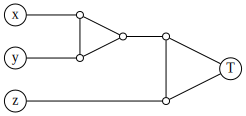

In [73]:
GC.view

In [ ]:
GC.write('assets/images/agreg2022_S0E2/GC')

Le graphe d'une formule $\varphi$ est le graphe $G_\varphi$ construit sur le principe ci-dessus, pour chaque clause. 

#### Q37

On considère $\varphi_1 = (\bar{a} \vee b \vee \bar{c}) \wedge (a \vee b \vee \bar{c}) \wedge (a \vee \bar{b} \vee c)$. Voici $G_{\varphi_1}$ :

In [ ]:
PHI1 = pygraph.Graph(24)
PHI1.add_edges_from([(0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,23),
                    (2,3), (4,5), (6,7),
                    (2,8), (2,22), (3,10), (4,9), (4,11), (5,12), (6,13), (7,18), (7,20),
                    (8,9), (8,14), (9,14), (10,11), (10,15), (11,15), (12,13), (12,16), (13,16),
                    (14,17), (15,19), (16,21),
                    (17,18), (19,20), (21,22),
                    (17,23), (18,23), (19,23), (20,23), (21,23), (22,23),
                    (1,23)])

In [ ]:
PHI1.position([(23, 0, 0),
              (17,-3,1), (18,-2.5,1), (19,-0.5,1), (20,0.5,1), (21,2,1), (22,3,1),
              (14,-3,1.5), (15,-0.5,1.5), (16,2,1.5),
              (8,-3.5,2), (9,-2.5,2), (10,-1,2), (11,0,2), (12,1.5,2), (13,2.5,2),
              (2,-4,3), (3,-3.5,3), (4,-1.5,3), (5,-1,3), (6,1,3), (7,1.5,3),
              (0,-3,4.5), (1,0.5,4.5)])

In [ ]:
PHI1.set_labels('KFaȧbḃcċ               T')
PHI1.label_on()

In [ ]:
for s in range(8, 23):
    PHI1.resize(0.12, node_id=s)

In [ ]:
PHI1.scale(0.7)

In [ ]:
PHI1.view

In [ ]:
PHI1.write('assets/images/agreg2022_S0E2/PHI1')

In [ ]:
PHI1.colorise()
PHI1.color_on()
PHI1.view

#### Q38

Soit $n$ la taille de la 3-FNC $\varphi$. Alors $\varphi$ possèdent $m$ littéral positif avec $m\lt 3n$. Le nombre de sommets de $G_\varphi$ sera (par construction) : $8 + 2m$. Quand au nombre d'arêtes il est de $3 + 3m + 10n$. Au total on a donc $11 + 5m + 10n$ _éléments de construction_ quantité inférieure à $11 + 25n$ justifiant ainsi une construction en temps polynomial.

#### Q39

On considère la graphe suivant :

In [74]:
G39 = pygraph.Graph(10)
G39.add_edges_from([(0,1), (0,2), (0,3), (0,9), (1,4), (2,5), (4,6), (5,6), (6,7), (3,8), (7,8), (7,9), (8,9), (4,5)])
G39.position([(0,0,-0.25), (3,1,0.25), (2,1,1), (1,1,2), (4,2,2), (5,2,1), (6,3,1.5), (7,4,1.5), (8,4,0.25), (9,5,-0.25)], 0.6)

In [75]:
G39.set_labels('Kxyz45678T')
G39.label_on()

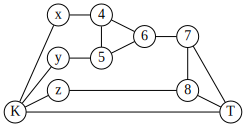

In [76]:
G39.view

In [ ]:
G39.write('assets/images/agreg2022_S0E2/G39')

Ci-dessous une 3-coloration qui prouve que ce graphe est 3-colorable.

In [77]:
G39.colorise()

3

In [78]:
G39.color_on()

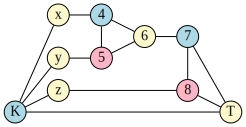

In [79]:
G39.view

In [ ]:
G39.write('assets/images/agreg2022_S0E2/G39_coloration')

Soit une 3-coloration, nous allons montrer que $x$, $y$ ou $z$ est de la même couleur que $T$.

On suppose $T$ de couleur 0. $T$ forme un triangle avec les sommets 7 et 8, on a donc les 3 couleurs. Supposons que 8 soit de couleur 2. Dès lors $z$ est de couleur 0 ou 1. Si c'est 0 c'est comme $T$. Sinon, $z$ est de couleur 1. Ce qui impose la couleur 2 à $K$ (qui est relié à $z$ et à $T$). Dès lors $x$ et $y$ ne peuvent pas être de couleur 2. Il reste la couleur 1 ou 0. Montrons que 1 n'est pas possible. En effet, si $x$ et $y$ sont tous les deux 1 alors les noeuds 4 et 5 ne peuvent pas être 1 et donc se partagent les couleurs 0 et 2 laissant 1 pour le noeud 6 (4, 5, 6 forment un triangle). Mais alors le noeud 7 est de couleur 2 et 8 de couleur 1 ce qui n'est pas possible puisque relié à $z$.

#### Q40

Il faut montrer que $\varphi$ est satisfiable si et seulement si $G_\varphi$ est 3-colorable.

- Soit une 3-coloration de $G_\varphi$. Pour chaque clause $C_i$ de $\varphi$, il existe un littéral $x_i$ dont le sommet associé est de même couleur que le noeud $T$. On affecte à _Vrai_ chacun de ces $x_i$.

- Soit une affectation des variables de $\varphi$ qui satisfait la formule. On construit alors la 3-coloration suivante : chaque litteral à _vrai_ prend la couleur 0, ainsi que le sommet $T$. Les négations des littéraux prennent la couleur 1 ainsi que le noeud $F$. Les deux noeuds entre les littéraux et $T$ se partagent les 2 couleurs 1 et 2. Les triangles entre les littéraux et le triangle de $T$ prend les 3 couleurs. Quand au noeud $K$ il prend la couleur 2.à faire_

#### Q41

Puisqu'on a 3-SAT $\leq_P$ 3_coloration et que 3-SAT est NP-complet alors 3-coloration est au moins NP-difficile.

### 3.4 Algorithmes gloutons

On va étudier les algorithmes suivants :

```
Début algorithme
    Entréee : graphe G = (S, A)
    Pour chaque sommet s in S non coloré Faire
        Colorer s avec la plus petite couleur possible
```

#### Q42

In [80]:
def minimum(L):
    mini = L[0] if L else 0
    for e in L:
        if mini > e:
            mini = e
    return mini

def plus_petit_absent(L):
    if minimum(L) > 0:
        absent = 0
    else:
        absent = 1
        for e in L:
            if e == absent:
                absent += 1
    return absent

In [81]:
plus_petit_absent([2, 0])

1

#### Q43

In [82]:
def colo_glouton(G):
    n = len(G)
    coloration = [-1] * n
    for i in range(n):
        if coloration[i] == -1:
            couleur = plus_petit_absent([coloration[j] for j in G[i] if coloration[j] != -1])
            coloration[i] = couleur
    return coloration

#### Q44

`plus_petit_absent` est linéaire en la longueur de la liste. Cette liste ici dans le pire des cas est la totalité des arètes. On a donc un complexité totale en ${\cal O}(n\times m)$.

#### Q45

On considère le graphe $G_2$ suivant :

In [83]:
G2 = pygraph.Graph(5)
G2.add_edges_from([(0, 1), (0, 4), (1, 4), (3, 4), (1, 3), (2, 3)])
G2.position([(0, 0, 0), (1, 1, -0.75), (4, 1, 0.75), (3, 2, 0), (2, 3, 0)], 0.7)

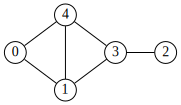

In [84]:
G2.view

In [ ]:
G2.write('../assets/images/agreg2022_S0E2/G2')

Ce qui correspond à la liste de listes d'adjacences suivante :

In [85]:
AG2 = [[1, 4], [0, 3, 4], [3], [1, 2, 4], [0, 1, 3]]

Et notre algo glouton de coloration va se _fourvoyer_ en état obligé d'attribuer une quatrième couleur au noeud 4 :

In [86]:
colo_glouton(AG2)

[1, 0, 1, 2, 3]

#### Q46

Soit $G$ un graphe tel que $\chi(G) = k$. Soit $C$ la $k$-coloration : $0, 1,\ldots k-1$, alors si on considère l'indexation des sommets qui suit la coloration : on commence par numéroter $0, 1,\ldots n_0$ tous les sommets avec la couleur 0, on continue $n_0+1,\ldots n_1$ tous ceux colorés avec 1 etc. L'algorithme glouton donnera alors la coloration $C$.

#### Q47

Dans $G_2$, c'est le fait de traiter le sommet 4 en dernier qui fait rater la coloration optimale. Avec l'algorithme de Walsh-Powell on a la garantie de traiter les sommets 1, 3, et 4 avant les 2 autres. Ainsi le triangle sera coloré 0, 1, 2 et le sommet 2 peut avoir une des couleurs du sommet 1 ou du sommet 4. Le noeud 0 aura la couleur du sommet 3. On garantit donc la 3-coloration.

Les graphes couronnes à $2n$ sommets.

In [87]:
def jn(n):
    couronne = pygraph.Graph(2*n)
    for i in range(n):
        for j in range(n, 2*n):
            if i%n != j%n:
                couronne.add_edge(i, j)
    return couronne

In [88]:
J3 = jn(3)

In [89]:
J4 = jn(4)

In [90]:
J5 = jn(5)

In [91]:
def jn_en_ligne(jn):
    pos = []
    n = len(jn.node_ids()) // 2
    for i in range(n):
        pos.append((i, 0, -i))
    for j in range(n, 2*n):
        pos.append((j, 1.5, -(j%n)))
    jn.position(pos, 0.7)

In [92]:
jn_en_ligne(J3)

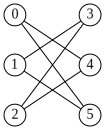

In [93]:
J3.view

In [ ]:
J3.write('../assets/images/agreg2022_S0E2/J3_ligne')

In [94]:
jn_en_ligne(J4)

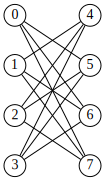

In [95]:
J4.view

In [ ]:
J4.write('../assets/images/agreg2022_S0E2/J4_ligne')

In [96]:
jn_en_ligne(J5)

In [ ]:
J5.write('../assets/images/agreg2022_S0E2/J5_ligne')

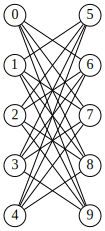

In [97]:
J5.view

In [98]:
from math import cos, sin, pi

def jn_en_couronne(jn, rayon=1):
    n = len(jn.node_ids()) // 2
    pos = []
    a = 0
    for i in range(n):
        pos.append((i, rayon*cos(a), rayon*sin(a)))
        a += 2*pi/n
    a = (((n - 1)//2)*2+1) * pi/n
    for i in range(n, 2*n):
        pos.append((i, rayon*cos(a), rayon*sin(a)))
        a += 2*pi/n
    jn.position(pos)

In [99]:
jn_en_couronne(J3)

In [100]:
J3.scale(0.7)

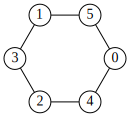

In [101]:
J3.view

In [ ]:
J3.write('../assets/images/agreg2022_S0E2/J3_couronne')

In [102]:
jn_en_couronne(J4)

In [103]:
J4.scale(0.7)

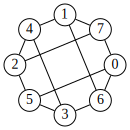

In [104]:
J4.view

In [ ]:
J4.write('../assets/images/agreg2022_S0E2/J4_couronne')

In [105]:
jn_en_couronne(J5)

In [ ]:
J5.write('../assets/images/agreg2022_S0E2/J5_couronne')

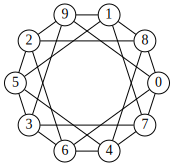

In [106]:
J5.view

#### Q48

Soit $J_n = (\{x_1,\ldots x_n\}\cup \{y_1,\ldots y_n\}, S)$ un graphe couronne avec $n\geq 3$. Notons que tout sommet de $J_n$ est de degré $n - 1$ c'est donc l'indexation qui détermine l'ordre suivant lequel les sommets sont colorés.

##### Une 2-coloration

La coloration $C$ obtenue en suivant l'indexation suivante est une 2-coloration : $\forall 1\leq i\leq n, I(x_i) = i$ et $\forall 1\leq i\leq n, I(y_i) = n + i$. En effet tous les $x_i$ n'étant pas liés entre eux, à chaque $x_i$ choisit, la plus petite couleur est 0. Puis, pour chaque $y_j$ il sera relié à des $x_i$ et uniquement des $x_i$, la plus petite couleur sera donc 1.

##### Une $n$-coloration

On considère maintenant l'indexation suivante : $\forall 1\leq i\leq n, I(x_i) = 2i - 2$ et $\forall 1\leq i\leq n, I(y_i) = 2i - 1$. Montrons que pour tout $1\leq i\leq n$, on a $x_i$ et $y_i$ qui sont de couleur $i - 1$ (propriété que nous nommons $P(i)$).

- $P(1)$ est vraie : en effet les premier sommet choisi sera $x_1$ et donc avec la couleur 0. Puis le deuxième numéro est 2 et c'est le sommet $y_1$ qui, n'étant pas lié à $x_1$ peut avoir aussi la couleur 0.
- Supposons $P(i-1)$. Le prochain sommet à colorier est $x_i$ lié à chacun des $y_1,\ldots y_{i-1}$. D'après $P(i-1)$ ces sommets $y_j$ occupent les couleurs de 0 à $i-2$ et la plus petite couleur non utilisée est donc $i - 1$. Le sommet suivant est $y_i$, lié à $x_1,\ldots x_{i-1}$, mais pas à $x_i$. Les $x_j$ occupent les couleurs $0,\ldots i-2$ et la plus petite couleur utilisable est $i-1$. 

En conséquence, $P(n)$ est vraie et prouve que l'indexation $I$ conduit l'algorithme à une $n$-coloration.

In [107]:
J5.colorise()
J5.color_on()

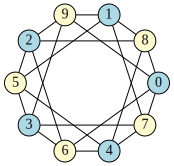

In [108]:
J5.view

In [ ]:
J5.write('../assets/images/agreg2022_S0E2/J5_2_coloration')

In [109]:
c = 0
for i in range(4):
    J4.color_on(i, c)
    J4.color_on(4+i, c)
    c += 1


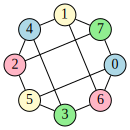

In [110]:
J4.view

In [ ]:
J4.write('../assets/images/agreg2022_S0E2/J4_4_coloration')

#### Q49

On considère le graphe suivant :

In [111]:
G3 = pygraph.Graph(11)
G3.add_edges_from([(0, 1), (1, 2), (1, 3), (1, 4), (4, 5), (5, 6), (5, 7), (7, 8), (7, 9), (7, 10)])
G3.position([(0, 0, 0), (1, 1, 0), (2, 1, 1), (3, 1, -1), (4, 2, 0), (5, 3, 0), (6, 3, 1), (7, 4, 0), (8, 4, 1), (9, 4, -1), (10, 5, 0)], 0.8)

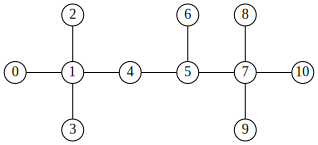

In [112]:
G3.view

In [ ]:
G3.write('../assets/images/agreg2022_S0E2/G3')

Quelle que soit l'indexation choisie, l'algorithme va prendre l'ordre suivant :

1. les deux sommets d'ordre 4 (1 et 7 dans notre exemple)
2. le sommet d'ordre 3 (sommet 5)
3. le sommet d'ordre 2 (sommet 4)
4. enfin les sommets d'odre 1, dans un ordre qui va dépendre de l'indexation choisie

Construisons la coloration :

1. les sommets d'ordre 4 ne sont pas reliés entre eux, ils seront choisis les premiers et auront la couleur 0, peu importe l'ordre 
2. est ensuite choisi le sommet d'ordre 3 qui est lié à un des sommets d'ordre 4 : sa couleur sera donc 1
3. le sommet d'ordre 2 étant lié aux sommets d'ordre 4 et 3, les couleurs 0 et 1 lui sont interdites, la plus petite possible est donc 2

On obtient donc une $k$-coloration avec $k\geq 3$ alors que la coloration suivante est une 2-coloration :

- On colorie en 0 : 0, 2, 3, 4, 6, 7
- On colorie en 1 : 1, 5, 8, 9, 10

In [113]:
G3.colorise()

2

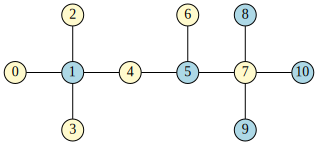

In [114]:
G3.color_on()
G3.view

In [ ]:
G3.write('../assets/images/agreg2022_S0E2/G3_2_coloration')

## 4 Coloration de graphes d'intervalles

#### Q50

Soit $G = (S, A)$ un graphe d'intervalles et $r$ une réalisation de $G$.

- Soit `ordo` un ordonnancement cohérent de $r$. Montrons que `ordo` est une coloration de $G$. Soit $(i, j)\in A$ alors cela signifie que les tâches associés $t_i$ et $t_j$ sont telles que $t_i\cap t_j\ne \emptyset$. Comme `ordo` est cohérent on a `ordo[i] != ordo[j]`.

- Soit $c$ une coloration de $G$. Montrons que `c` est un ordonnancement cohérent des tâches de $r$. Soit $t_i$ et $t_j$ deux tâches telles que $i\ne j$. Si les sommets $i$ et $j$ associés sont tels que $c(i) \ne c(j)$ alors l'ordonnancement ne prévoit pas les mêmes machines pour les deux tâches et il n'y a pas d'incohérence. Si au contraire $c(i) = c(j)$ alors puisque $c$ est une coloration, cela signifie que $(i, j)\notin A$ et par conséquent $t_i\cap t_j = \emptyset$ prouvant la cohérence.

#### Q51

Soit $G = (S, A)$ un graphe d'intervalles et $r$ une réalisation de $G$. On traite les sommets du graphe dans l'ordre croissant des dates de début des intervalles correspondant dans la réalisation $r$.

### 4.1 Parcours en largeur lexicographique

On considère le graphe $G_4$ ci-dessous :

In [115]:
G4 = pygraph.Graph(8)
G4.add_edges_from([(0,4), (0,7), (0,6), (0,5), (5,1), (5,6), (6,7), (7,4), (4,3), (3,2)])
G4.position([(7, -0.5, 0), (6, 0.5, 0), (0, 0, 1), (4, -1.5, 0), (5, 1.5, 0), (1, 1.5, -1), (2, 0, -1), (3, -1.5, -1)], 0.6)

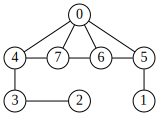

In [116]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4')

#### Q52

On applique l'agorithme de parcours en largeur lexicographique sur G4.

In [117]:
etiquettes = [''] * 8
selected = set()

In [118]:
def select(s, i):
    G4.color_on(s, 0)
    selected.add(s)
    G4.node_view(s).label = str(s)
    i -= 1
    for v in G4.neighbors(s):
        # on ne prend que les sommets non sélectionnés
        if v not in selected: 
            etiquettes[v] += str(i)
            G4.node_view(v).label = f'{v}-{etiquettes[v]}'
    G4.label_on()
    return i

##### Étape 1

On fixe l'étiquette de 0 à 8 :

In [119]:
i = 8
etiquettes[0] = str(i)
G4.node_view(0).label = f'0-{etiquettes[0]}'
G4.label_on()

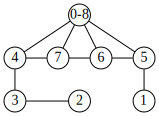

In [120]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-1')

##### Étape 2

On sélectionne le sommet 0 et on concatène 7 à l'étiquette des voisins :

In [121]:
i = select(0, i)

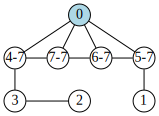

In [122]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-2')

##### Étape 3

On continue avec le sommet 4, qui le plus petit indice avec l'étiquette maximale 7.

In [123]:
i = select(4, i)

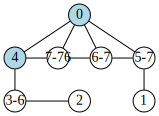

In [124]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-3')

##### Étape 4

On sélectionne le sommet 7 (étiquette maximale)

In [125]:
i = select(7, i)

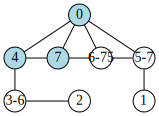

In [126]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-4')

##### Étape 5

Le suivant est le sommet 6 (étiquette maximale)

In [127]:
i = select(6, i)

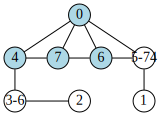

In [128]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-5')

##### Étape 6

Puis le sommet 5 (étiquette maximale)

In [129]:
i = select(5, i)

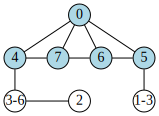

In [130]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-6')

##### Étape 7

Puis le sommet 3 (étiquette maximale)

In [131]:
i = select(3, i)

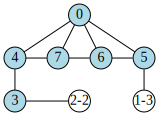

In [132]:
G4.view

In [ ]:
G4.write('../assets/images/agreg2022_S0E2/G4-7')

Et pour finir les sommets 1 et 2. On a $\sigma = (0, 4, 7, 6, 5, 3, 1, 2)$. 

#### Q53

L'algorithme glouton en suivant l'ordre LexBFS (donc avec le $\sigma$ précédent) donne : 

- premier sommet 0 : couleur 0
- puis 4 coloré en 1
- puis 7 couleur 2
- puis 6 couleur 1
- puis 5 couleur 2
- puis 3 couleur 0
- puis 1 couleur 0
- enfin 2 couleur 1

Par un parcours classique via indices croissants on aurait eu : 0 en couleur 0, 4 en couleur 1, 5 en 1, 6 en 2, 7 en 3 (puisque 0, 1 et 2 sont déjà pris par les voisins), 3 en 0, 1 en 0 et enfin 2 en 1. On n'obtient donc qu'une 4-coloration.

### 4.2 Application à la coloration de graphes d'intervalles

#### Q54

#### Q55

### 4.3 Implémentation

#### Q56

Choix des structures :

- un tableau pour les étiquettes
- un ensemble pour les sommets à traiter (retrait et test d'appartenance en temps constant)
- un tableau pour la coloration


In [160]:
def select(g, noeuds, etiquettes, coloration):
    """retourne le noeud de g non coloré qui maximise
    le nombre de degré et l'étiquette"""
    return max([v for v in noeuds if coloration[v] == -1], key=lambda s: (len(g[s]), etiquettes[s]))

#     s = None
#     for v in noeuds:
#         if s is None:
#             s = v
#         elif coloration[v] == -1:
#             if len(g[v]) > len(g[s]) or len(g[v]) == len(g[s]) and etiquettes[v] > etiquettes[s]:
#                 s = v
#     return s

def lexBFS(G):
    """Réalise une coloration glouton en suivant l'ordre lexBFS"""
    n = len(G)
    coloration = [-1] * n
    etiquettes = [''] * n
    etiquette = n
    noeuds_a_traiter = set(range(n))
    while noeuds_a_traiter:
        s = select(G, noeuds_a_traiter, etiquettes, coloration)
        print(s, end=', ')
        noeuds_a_traiter.remove(s)
        couleur = plus_petit_absent([coloration[j] for j in G[s] if coloration[j] != -1])
        coloration[s] = couleur
        etiquette -= 1
        for v in G[s]:
            if v in noeuds_a_traiter:
                etiquettes[v] += str(etiquette)
    return coloration

In [161]:
C = lexBFS(A2)

0, 4, 7, 6, 5, 3, 1, 2, 

In [149]:
for i, c in enumerate(C):
    G2.color_on(i, c)

In [154]:
G2.same_position_as(G4)

In [156]:
G2.scale(0.7)

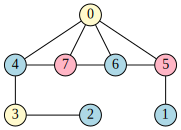

In [157]:
G2.view

In [158]:
G2.write('../assets/images/agreg2022_S0E2/G4-56')

Les fonctions `select` et `plus_petit_absent` ainsi que la mise à jour des étiquettes des voisins sont en ${\cal O}(n)$. La fonction principale est donc en ${\cal O(n^2)}$. 